In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

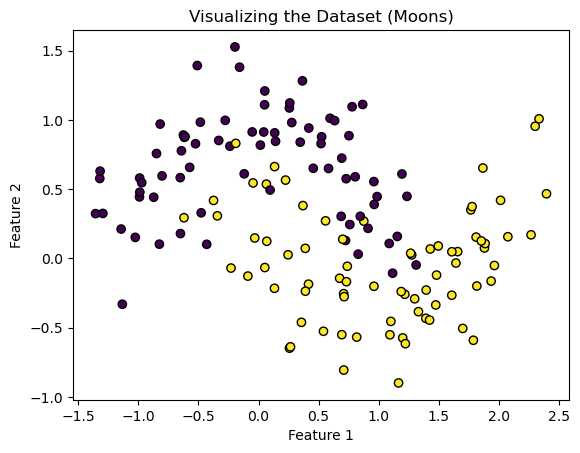

In [11]:
# Step 1: Generate some cool non-linear data using the 'make_moons' dataset
# Adding some noise for more realistic data points
X, y = make_moons(n_samples=150, noise=0.25, random_state=42)

# Plot the dataset to see what it looks like
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Visualizing the Dataset (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

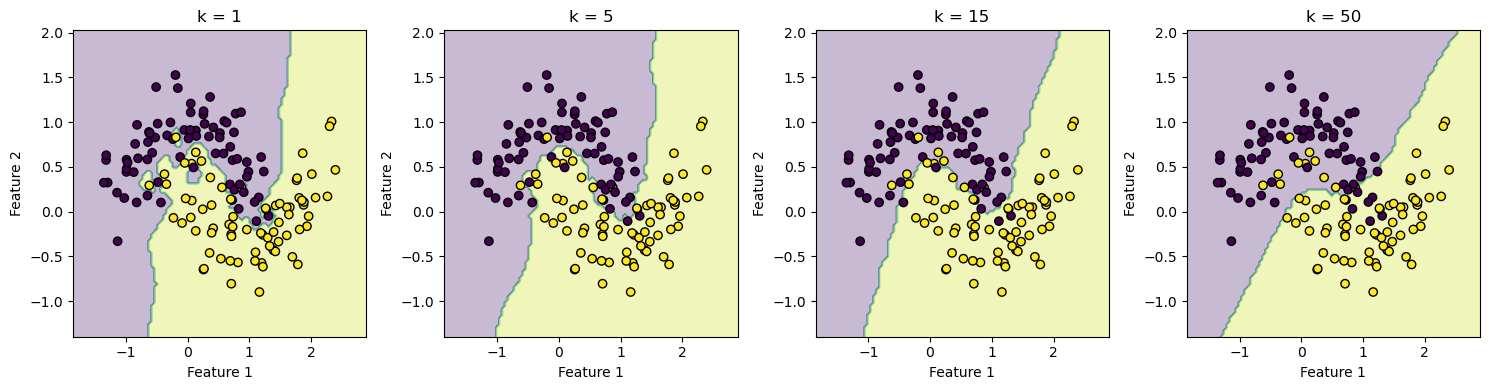

In [12]:
# Step 2: Try k-NN with a bunch of different k values and see how it changes the decision boundaries
k_values = [1, 5, 15, 50]  # Different k values to experiment with

# Set up subplots to visualize everything side by side
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 4))

for i, k in enumerate(k_values):
    # Initialize the k-NN classifier and train it on the data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Create a grid to plot decision boundaries (basically a fancy way to make a mesh)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # Adding some padding
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict for each point in the grid
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary (shaded regions showing classification zones)
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot the original data points on top for reference
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

    # Add a title for each subplot
    axes[i].set_title(f"k = {k}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

# Adjust layout so it looks cleaner
plt.tight_layout()
plt.show()